In [65]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

Training Image Size :  (60000, 28, 28)
Test Image Size :  (10000, 28, 28)


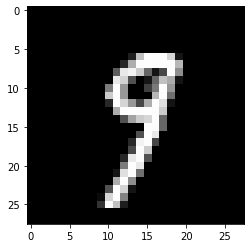

In [66]:
# load mnist dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('Training Image Size : ', X_train.shape)
print('Test Image Size : ', X_test.shape)
# sample image
plt.imshow(X_train[43], cmap=plt.get_cmap('gray'))
plt.show()

### Prepare Data

In [67]:
trainX = X_train.reshape([len(X_train),28*28])
testX = X_test.reshape([len(X_test),28*28])
trainY = Y_train
testY = Y_test

In [68]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

## Task 1

### Classifier 1 : SVM

In [69]:
from sklearn import svm

SVM_clf  =  svm.SVC(gamma=10,C=0.001,kernel='poly')
SVM_clf.fit(train_norm,trainY)
ySVM = SVM_clf.predict(test_norm)
svm_accuracy = accuracy_score(testY,ySVM)

In [70]:
print('SVM accuracy : ' + str(svm_accuracy*100) + '%')
print(classification_report(testY,ySVM))

SVM accuracy : 97.87%
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



##### Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification or regression problems. The objective of the support vector machine algorithm is to find a hyperplane in N-dimensional space(N — the number of features) that distinctly classify the data points. 
##### SVM is a good classifier for high dimensional spaces such as our current problem with 784 features, it also uses a subset of training points in the decision function (called support vectors), so it is also memory efficient, for our 60,000 n dimensional data points. The availability of multiple kernel functions is also a versatile pro which gives us a better option for fitting our image classification problem.
##### I have used sklearn's implementation of the algorithm for this task with a polynomial kernel and the hyperparameters C and gamma, the best hyperparameter values were chosen using a run of grid search.
####

### Classifier 2 : Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

LogReg_clf = LogisticRegression(solver = 'lbfgs', max_iter=1000)
LogReg_clf.fit(train_norm,trainY)
yLR = LogReg_clf.predict(test_norm)
LR_accuracy = accuracy_score(testY,yLR)

In [72]:
print('Logistic Regression accuracy : ' + str(LR_accuracy*100) + '%')
print(classification_report(testY,yLR))

Logistic Regression accuracy : 92.56%
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



##### Logistic Regression is the Supervised Learning Algorithm for solving classification problems. In short it can predict the probability of a target variable for a given class. the benefit of logistic regression in image classification is its interpretability we can use the coefficient values to understand what features (i.e. which pixels) areimportant in determining what class a sample belongs to. 
##### The plot below shows the coefficient vector for each class, with positive coefficients in blue and negative coefficients in red.We can see which pixels are positively associated with belonging to theclass, and which pixels are negatively associated with belonging to the class. For example, consider Class 0. If a sample has large values in the pixels shown in blue (the 0 shape around the center of the image), the probability of that sample being a 0 digit increases. If the sample has large values in the pixels in the center of the image, the probability of the sample being a 0 digit decreases.Many pixels have coefficients whose magnitude are very small. These are shown in white, and they are not very important for this classification task.
##### we can clearly see the probabilities form a sort of numerical shape for each class of the numbers


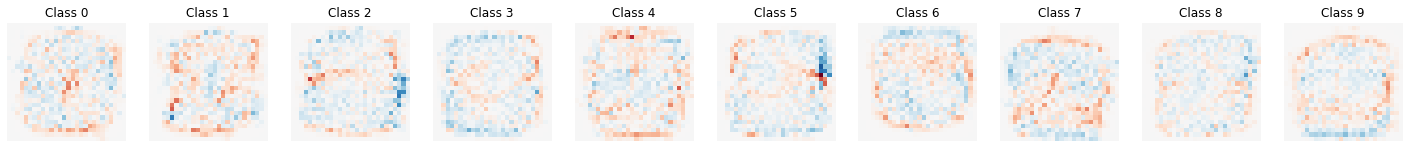

In [86]:

scale = np.max(np.abs(LogReg_clf.coef_))

p = plt.figure(figsize=(25, 2.5));

for i in range(10):
    p = plt.subplot(1, 10, i + 1)
    p = plt.imshow(LogReg_clf.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %i' % i);

### Classifier 3 : XGBoost

In [73]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(eval_metric = 'mlogloss',use_label_encoder=False)
xgb_clf.fit(train_norm,trainY)
yXGB = xgb_clf.predict(test_norm)
XGB_accuracy =  accuracy_score(testY,yXGB)

In [74]:
print('XGboost accuracy : ' + str(XGB_accuracy*100) + '%')
print(classification_report(testY,yXGB))

XGboost accuracy : 97.8%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



##### XGBoost is generally not prefferred for image classification or computer vision problems itself, it works well in ensembles with CNN or other image recognition algorithms to provide more accurate results, i chose this algorithm to experiment with how it interprets the classification problem, it surprisingly provides a very good result possibly specific to this particular problem.

### Comparision Table

In [85]:
pd.DataFrame([['SVM',svm_accuracy*100],\
            ['Logistic Regression',LR_accuracy*100],\
            ['XGBoost',XGB_accuracy*100]],\
                columns=['Model','Accuracy (%)'])

,Model,Accuracy (%)
0,SVM,97.87
1,Logistic Regression,92.56
2,XGBoost,97.80


## Task 2

### CNN

In [76]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import math

def get_weights(shape):
    data = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(data)

def get_biases(shape):
    data = tf.constant(0.1, shape=shape)
    return tf.Variable(data)

def create_layer(shape):
    # Get the weights and biases
    W = get_weights(shape)
    b = get_biases([shape[-1]])

    return W, b

def convolution_2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1],
            padding='SAME')

def max_pooling(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
            strides=[1, 2, 2, 1], padding='SAME')

def CNN(X_train, Y_train, X_test, Y_test):
    
    # The images are 28x28. Create the input layer
    x = tf.placeholder(tf.float32, [None, 784])

    # Reshape 'x' into a 4D tensor
    x_image = tf.reshape(x, [-1, 28, 28, 1])

    # Define the first convolutional layer
    W_conv1, b_conv1 = create_layer([5, 5, 1, 32])

    # Convolve the image with weight tensor, add the
    # bias, and then apply the ReLU function
    h_conv1 = tf.nn.relu(convolution_2d(x_image,W_conv1) + b_conv1)

    # Apply the max pooling operator
    h_pool1 = max_pooling(h_conv1)

    # Define the second convolutional layer
    W_conv2, b_conv2 = create_layer([5,5,32,64])

    # Convolve the output of previous layer with the
    # weight tensor, add the bias, and then apply
    # the ReLU function
    h_conv2 = tf.nn.relu(convolution_2d(h_pool1, W_conv2) + b_conv2)

    # Apply the max pooling operator
    h_pool2 = max_pooling(h_conv2)

    # Define the fully connected layer
    W_fc1, b_fc1 = create_layer([7 * 7 * 64, 1024])

    # Reshape the output of the previous layer
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])

    # Multiply the output of previous layer by the
    # weight tensor, add the bias, and then apply
    # the ReLU function * Use "tf.matmul" for matrix multiplication
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat,W_fc1) + b_fc1)

    # Define the dropout layer using a probability placeholder
    # for all the neurons
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    # Define the readout layer (output layer)
    W_fc2, b_fc2 = create_layer([1024, 10])
    y_conv = tf.matmul(h_fc1_drop,W_fc2) + b_fc2

    # Define the entropy loss and the optimizer
    y_loss = tf.placeholder(tf.float32, [None, 10])
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_loss))
    optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

    # Define the accuracy computation
    predicted = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_loss, 1))
    accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))

    # Create and run a session
    sess = tf.InteractiveSession()
    init = tf.initialize_all_variables()
    sess.run(init)

    # Start training
    batch_size = 75
    num_iterations = math.ceil(X_train.shape[0] / batch_size)
    start = 0
    end = batch_size
    print('\nTraining the model....')
    for i in range(num_iterations):
        # batch = mnist.train.next_batch(batch_size)
        batch = (X_train[start:end], Y_train[start:end])
        start = end
        end = min(end + batch_size, X_train.shape[0])

        # Print progress
        if i % 50 == 0:
            cur_accuracy = accuracy.eval(feed_dict = {
                    x: batch[0], y_loss: batch[1], keep_prob: 1.0})
            print('Iteration', i, ', Accuracy =', cur_accuracy)

        # Train on the current batch
        optimizer.run(feed_dict = {x: batch[0], y_loss: batch[1], keep_prob: 0.5})

    # Compute accuracy using test data
    test_accuracy = accuracy.eval(feed_dict = {
            x: X_test, y_loss: Y_test,
            keep_prob: 1.0})
    print('Test accuracy =', test_accuracy)
    sess.close()
    
    return test_accuracy

In [77]:
Y_train_encoded = to_categorical(Y_train)
Y_test_encoded  = to_categorical(Y_test)
CNN_accuracy = CNN(train_norm,Y_train_encoded,test_norm,Y_test_encoded)


Training the model....
Iteration 0 , Accuracy = 0.12
Iteration 50 , Accuracy = 0.70666665
Iteration 100 , Accuracy = 0.84
Iteration 150 , Accuracy = 0.9066667
Iteration 200 , Accuracy = 0.9066667
Iteration 250 , Accuracy = 0.94666666
Iteration 300 , Accuracy = 0.85333335
Iteration 350 , Accuracy = 0.96
Iteration 400 , Accuracy = 0.93333334
Iteration 450 , Accuracy = 0.9066667
Iteration 500 , Accuracy = 0.9066667
Iteration 550 , Accuracy = 0.9066667
Iteration 600 , Accuracy = 0.88
Iteration 650 , Accuracy = 0.94666666
Iteration 700 , Accuracy = 1.0
Iteration 750 , Accuracy = 0.94666666
Test accuracy = 0.9631


## Task 3

In [78]:
import cv2
import os
import numpy as np

rootdir = '/Users/pranshusavani/Desktop/my handwriting'

def read_img(img_path):
    img = cv2.imread(img_path)
    x_img = np.array([0] * 784)

    for i in range(28):
        for j in range(28):
            idx = i * 28 + j
            x_img[idx] = 255 - img[i][j][0]
            
    return x_img, img
    
X_mydigits = []
Y_mydigits = []
digit_imgs = []

# read handwritten digits
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".png"):
            path = os.path.join(subdir, file)
            digit, img = read_img(path)
            label = int(os.path.splitext(file)[0])
            X_mydigits.append(digit)
            Y_mydigits.append(label)
            digit_imgs.append(img)

X_mydigits = np.array(X_mydigits)
Y_mydigits = np.array(Y_mydigits)

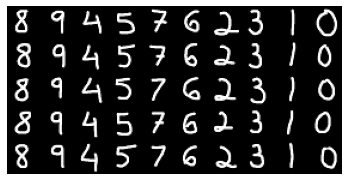

In [79]:
# show handwritten images
temp_img = ''
for i in range(5):
    hor = ''
    for j in range(10):
        idx = i*10 + j
        img = digit_imgs[idx]
        if j == 0:
            hor = img
        else:
            hor = np.hstack((hor, img))
    if i == 0:
        temp_img = hor
    else:
        temp_img = np.vstack((temp_img, hor))

plt.imshow(temp_img)
plt.axis('off')
plt.show()

In [80]:
X_mydigits_norm  = X_mydigits.astype('float32')
X_mydigits_norm = X_mydigits_norm / 255.0

In [81]:
acc_mydig_SVM = accuracy_score(Y_mydigits,SVM_clf.predict(X_mydigits_norm))
acc_mydig_LR = accuracy_score(Y_mydigits,LogReg_clf.predict(X_mydigits_norm))
acc_mydig_XGB = accuracy_score(Y_mydigits,xgb_clf.predict(X_mydigits_norm))
acc_mydig_CNN = CNN(train_norm,Y_train_encoded,X_mydigits_norm,to_categorical(Y_mydigits))



Training the model....
Iteration 0 , Accuracy = 0.093333334
Iteration 50 , Accuracy = 0.81333333
Iteration 100 , Accuracy = 0.84
Iteration 150 , Accuracy = 0.8933333
Iteration 200 , Accuracy = 0.92
Iteration 250 , Accuracy = 0.94666666
Iteration 300 , Accuracy = 0.85333335
Iteration 350 , Accuracy = 0.96
Iteration 400 , Accuracy = 0.92
Iteration 450 , Accuracy = 0.93333334
Iteration 500 , Accuracy = 0.92
Iteration 550 , Accuracy = 0.88
Iteration 600 , Accuracy = 0.9066667
Iteration 650 , Accuracy = 0.97333336
Iteration 700 , Accuracy = 1.0
Iteration 750 , Accuracy = 0.94666666
Test accuracy = 0.08


In [84]:
pd.DataFrame([['SVM',acc_mydig_SVM*100],\
            ['Logistic Regression',acc_mydig_LR*100],\
            ['XGBoost',acc_mydig_XGB*100],\
            ['CNN',acc_mydig_CNN*100]],\
                columns=['Model','Accuracy (%)'])

,Model,Accuracy (%)
0,SVM,2.0
1,Logistic Regression,2.0
2,XGBoost,4.0
3,CNN,8.0


### Potential Gaps Identified

##### In the Mnist dataset the images are well centered from the edges, the handwritings are not too vague to become outliers, also the CNN model I trained has only 2 convolution layers with a small number of filters and channel size, deeper neural networks would definitely give better results.